<img src="housing.png">

**Introduction**

This housing dataset comprises of various features related to real estate properties and their valuation. Real estate valuation is crucial as it determines the market value of a property, influencing investment decisions, sales, and purchases. This dataset offers a unique opportunity to analyze and predict real estate prices based on several influencing factors.

This was downloaded from the UC Irvine Machine Learning Repository and shows market historical data collected from Sindian Dist., New Taipei City, Taiwan

Dataset Features:

    1. id: A unique identifier for each property.
    2. transaction_date: The transaction date (encoded in a specific format of YYYY.xxx. For example, 2013.250=2013 March, 2013.500=2013 June, etc.).
    3. house_age: The age of the house in years.
    4. rooms: Number of rooms in the unit
    5. bathrooms: Number of bathrooms in the unit
    6. distance_mrt: The distance to the nearest Mass Rapid Transit (MRT) station (meters).
    7. num_conv_store: The number of convenience stores in the vicinity (integer).
    8. lat: The geographical latitude of the property (degree).
    9. long: The geographical longitude of the property (degree).
    10. price_unit_area: The house price of unit area, the target variable for prediction. (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

The target variable, <i><b>price_unit_area</b></i>, indicates the price per unit area of each property, which we aim to predict based on the features mentioned above.

**Problem Statement**

The main objective is to predict the "price_unit_area" based on the features provided. Understanding the relationship between property features and their market valuation can aid investors, buyers, and sellers in making informed decisions. Specifically, the problem is a regression task where the continuous outcome (house price per unit area) needs to be predicted based on the input features.

<b>Methodology</b>

To ensure the model's effectiveness, the dataset will undergo several steps, including:

    Data Preprocessing:
        Data Cleaning: Handle missing values, if any, and remove any duplicate records.
        Feature Engineering: Derive new features if necessary (e.g., age categories from 'house_age').
        Data Transformation: Normalize or scale the features, especially since distance and age could have different scales and distributions.

    Exploratory Data Analysis (EDA):
        Analyze the distributions of individual variables.
        Explore the relationships between features and the target variable using visualizations and correlation matrices.

    Model Selection:
        Fixed - Use KNeighborsRegressor

    Model Training and Validation:
        Split the dataset into training and testing sets.
        Train the models on the training set.
        Validate the models using the testing set.
        Use appropriate metrics for regression (e.g., R-squared) to evaluate model performance.

    Model Tuning:
        Perform hyperparameter tuning to optimize the models.
        Use cross-validation to ensure the model's generalizability.

    Insights and Conclusion:
        Interpret the model results.
        Discuss the impact of different features on house prices.
        Provide recommendations or insights derived from the analysis.

**Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression

**Load and Inspect Data**

In [5]:
# Load the dataset
file_path = 'housing_data.xlsx'
data = pd.read_excel(file_path)

# Check the shape of the data
print(f'The housing data shape is {data.shape}')

# Show data structure
data.head(10)

The housing data shape is (414, 10)


,id,transaction_date,house_age,rooms,bathrooms,distance_mrt,num_conv_store,lat,long,price_unit_area
0,346,2012.666667,0.0,1,1,185.42960,0,24.97110,121.53170,23.8
1,255,2012.666667,1.1,2,1,329.97470,5,24.98254,121.54395,34.1
2,20,2012.666667,1.5,3,3,23.38284,7,24.96772,121.54102,59.6
3,276,2012.666667,1.5,2,1,23.38284,7,24.96772,121.54102,31.3
4,27,2012.666667,3.1,3,3,383.86240,5,24.98085,121.54391,57.8
5,39,2012.666667,3.1,3,2,577.96150,6,24.97201,121.54722,55.1
6,411,2012.666667,5.6,1,1,90.45606,9,24.97433,121.54310,12.2
7,343,2012.666667,5.7,1,1,90.45606,9,24.97433,121.54310,24.4
8,6,2012.666667,7.1,3,3,2175.03000,3,24.96305,121.51254,70.1
9,325,2012.666667,12.4,1,1,1712.63200,2,24.96412,121.51670,25.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                414 non-null    int64  
 1   transaction_date  414 non-null    float64
 2   house_age         414 non-null    float64
 3   rooms             414 non-null    int64  
 4   bathrooms         414 non-null    int64  
 5   distance_mrt      414 non-null    float64
 6   num_conv_store    414 non-null    int64  
 7   lat               414 non-null    float64
 8   long              414 non-null    float64
 9   price_unit_area   414 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 32.5 KB


In [7]:
data.describe()

,id,transaction_date,house_age,rooms,bathrooms,distance_mrt,num_conv_store,lat,long,price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1.900966,1.502415,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,0.763799,0.640629,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,1.000000,1.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,1.000000,1.000000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,2.000000,1.000000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,2.000000,2.000000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6.000000,4.000000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
# Check for any missing values
missing_values = data.isnull().sum()

# Display count of missing values per feature
missing_values

id                  0
transaction_date    0
house_age           0
rooms               0
bathrooms           0
distance_mrt        0
num_conv_store      0
lat                 0
long                0
price_unit_area     0
dtype: int64

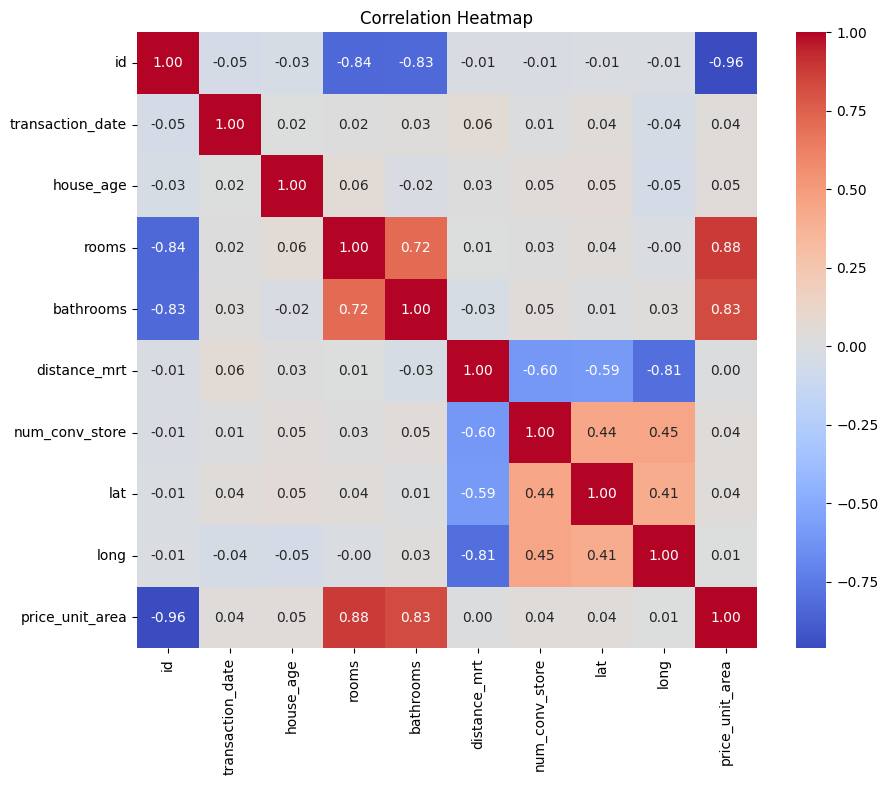

In [9]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Feature Engineering**

**Year and Month Extraction**

In [10]:
# Function to extract year and month
def extract_year_month(transaction_date):
    year = int(transaction_date)
    month = int(round((transaction_date - year) * 12))
    if month == 12:
        year += 1
        month = 0
    return year, month + 1  # months are 1-12, not 0-11

# Apply the function to the transaction date column
data['year'], data['month'] = zip(*data['transaction_date'].apply(extract_year_month))

**Combine Latitutde and Longitude**

In [11]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d


data['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(data.lat, data.long)]

**Create Interaction Features**

In [12]:
# Set interaction_only=True to get interaction features only
# Include_bias=False to avoid generating a column of ones
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Selecting the columns for interaction terms
features = data[['house_age', 'distance_mrt', 'num_conv_store', 'harvesine_distance']]

# Fit and transform the data
interaction_features = poly.fit_transform(features)

# Convert the interaction features into a DataFrame
interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(features.columns))

# Display the interaction features
interaction_df.head()

,house_age,distance_mrt,num_conv_store,harvesine_distance,house_age distance_mrt,house_age num_conv_store,house_age harvesine_distance,distance_mrt num_conv_store,distance_mrt harvesine_distance,num_conv_store harvesine_distance
0,0.0,185.42960,0.0,13154.325078,0.00000,0.0,0.000000,0.00000,2.439201e+06,0.000000
1,1.1,329.97470,5.0,13155.201242,362.97217,5.5,14470.721366,1649.87350,4.340884e+06,65776.006211
2,1.5,23.38284,7.0,13155.328782,35.07426,10.5,19732.993173,163.67988,3.076089e+05,92087.301474
3,1.5,23.38284,7.0,13155.328782,35.07426,10.5,19732.993173,163.67988,3.076089e+05,92087.301474
4,3.1,383.86240,5.0,13155.244499,1189.97344,15.5,40781.257945,1919.31200,5.049804e+06,65776.222493


In [13]:
# Add an index to both dataframes to ensure they merge correctly
data.index = range(len(data))
interaction_df.index = range(len(interaction_df))

# Merge the interaction features with the original dataframe using a left join
extended_data = data.merge(interaction_df, left_index=True, right_index=True, how='left', suffixes=('', '_interact'))

# Optionally, drop the original columns used for interactions if you only want to keep the interaction terms
# In this case, we will keep them

extended_data.head()

,id,transaction_date,house_age,rooms,bathrooms,distance_mrt,num_conv_store,lat,long,price_unit_area,...,house_age_interact,distance_mrt_interact,num_conv_store_interact,harvesine_distance_interact,house_age distance_mrt,house_age num_conv_store,house_age harvesine_distance,distance_mrt num_conv_store,distance_mrt harvesine_distance,num_conv_store harvesine_distance
0,346,2012.666667,0.0,1,1,185.42960,0,24.97110,121.53170,23.8,...,0.0,185.42960,0.0,13154.325078,0.00000,0.0,0.000000,0.00000,2.439201e+06,0.000000
1,255,2012.666667,1.1,2,1,329.97470,5,24.98254,121.54395,34.1,...,1.1,329.97470,5.0,13155.201242,362.97217,5.5,14470.721366,1649.87350,4.340884e+06,65776.006211
2,20,2012.666667,1.5,3,3,23.38284,7,24.96772,121.54102,59.6,...,1.5,23.38284,7.0,13155.328782,35.07426,10.5,19732.993173,163.67988,3.076089e+05,92087.301474
3,276,2012.666667,1.5,2,1,23.38284,7,24.96772,121.54102,31.3,...,1.5,23.38284,7.0,13155.328782,35.07426,10.5,19732.993173,163.67988,3.076089e+05,92087.301474
4,27,2012.666667,3.1,3,3,383.86240,5,24.98085,121.54391,57.8,...,3.1,383.86240,5.0,13155.244499,1189.97344,15.5,40781.257945,1919.31200,5.049804e+06,65776.222493


**Scale Continuous Features**

In [14]:
# Scale the continuous features
scaler = StandardScaler()
continuous_features = ['house_age', 'rooms', 'bathrooms',
       'distance_mrt', 'num_conv_store', 'year', 'month',
        'harvesine_distance', 'house_age_interact',
        'distance_mrt_interact', 'num_conv_store_interact',
       'harvesine_distance_interact', 'house_age distance_mrt',
       'house_age num_conv_store', 'house_age harvesine_distance',
       'distance_mrt num_conv_store', 'distance_mrt harvesine_distance',
       'num_conv_store harvesine_distance']

extended_data[continuous_features] = scaler.fit_transform(extended_data[continuous_features])

# Display the scaled data
extended_data[continuous_features].head()

,house_age,rooms,bathrooms,distance_mrt,num_conv_store,year,month,harvesine_distance,house_age_interact,distance_mrt_interact,num_conv_store_interact,harvesine_distance_interact,house_age distance_mrt,house_age num_conv_store,house_age harvesine_distance,distance_mrt num_conv_store,distance_mrt harvesine_distance,num_conv_store harvesine_distance
0,-1.556639,-1.181013,-0.785202,-0.712730,-1.391638,-1.511858,0.758129,-0.158062,-1.556639,-0.712730,-1.391638,-0.158062,-0.700387,-0.857093,-1.556619,-1.105122,-0.712812,-1.391597
1,-1.459968,0.129816,-0.785202,-0.598065,0.307885,-1.511858,0.758129,0.472520,-1.459968,-0.598065,0.307885,0.472520,-0.687394,-0.793543,-1.459943,-0.277518,-0.598106,0.307912
2,-1.424814,1.440645,2.340506,-0.841279,0.987694,-1.511858,0.758129,0.564312,-1.424814,-0.841279,0.987694,0.564312,-0.699131,-0.735771,-1.424787,-1.023017,-0.841386,0.987739
3,-1.424814,0.129816,-0.785202,-0.841279,0.987694,-1.511858,0.758129,0.564312,-1.424814,-0.841279,0.987694,0.564312,-0.699131,-0.735771,-1.424787,-1.023017,-0.841386,0.987739
4,-1.284201,1.440645,2.340506,-0.555316,0.307885,-1.511858,0.758129,0.503652,-1.284201,-0.555316,0.307885,0.503652,-0.657790,-0.678000,-1.284168,-0.142363,-0.555346,0.307918


In [15]:
# Export new extended_data
# extended_data.to_excel('housing_data_new.xlsx', index=False)

# **Visualize Correlations**

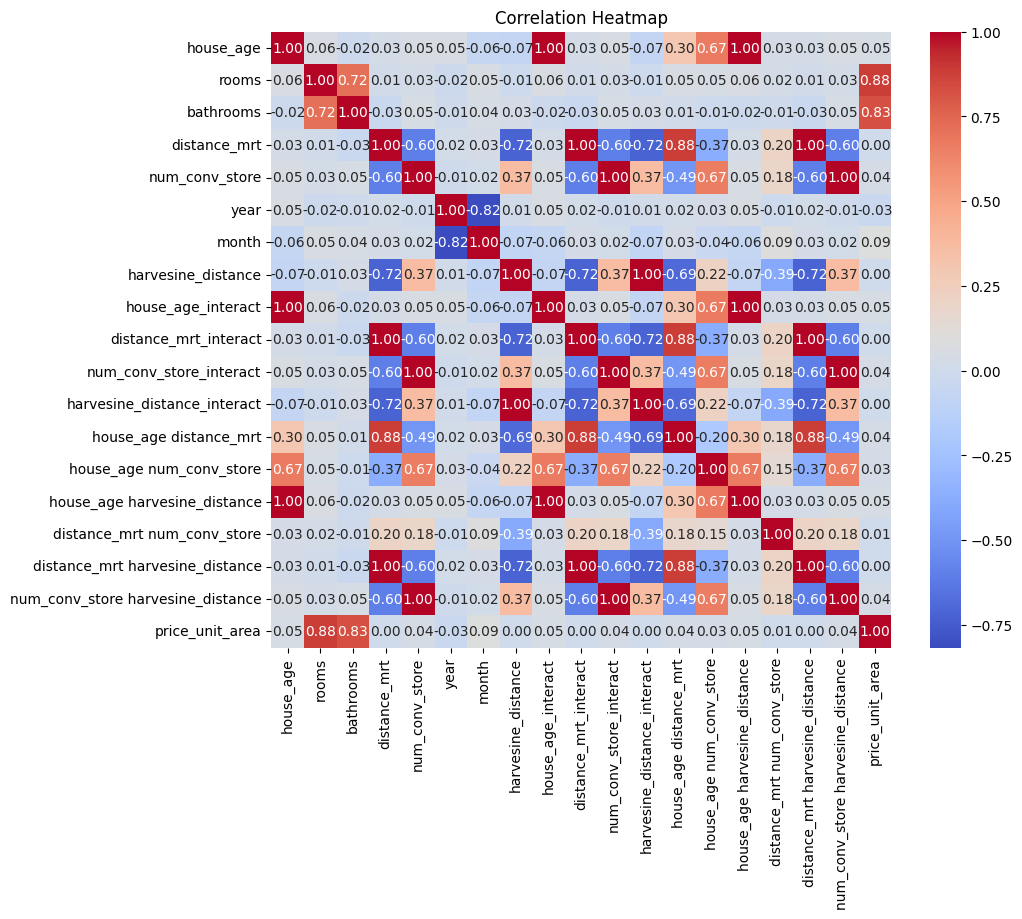

In [16]:
# Calculate correlation matrix
correlation_matrix = extended_data[continuous_features + ['price_unit_area']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

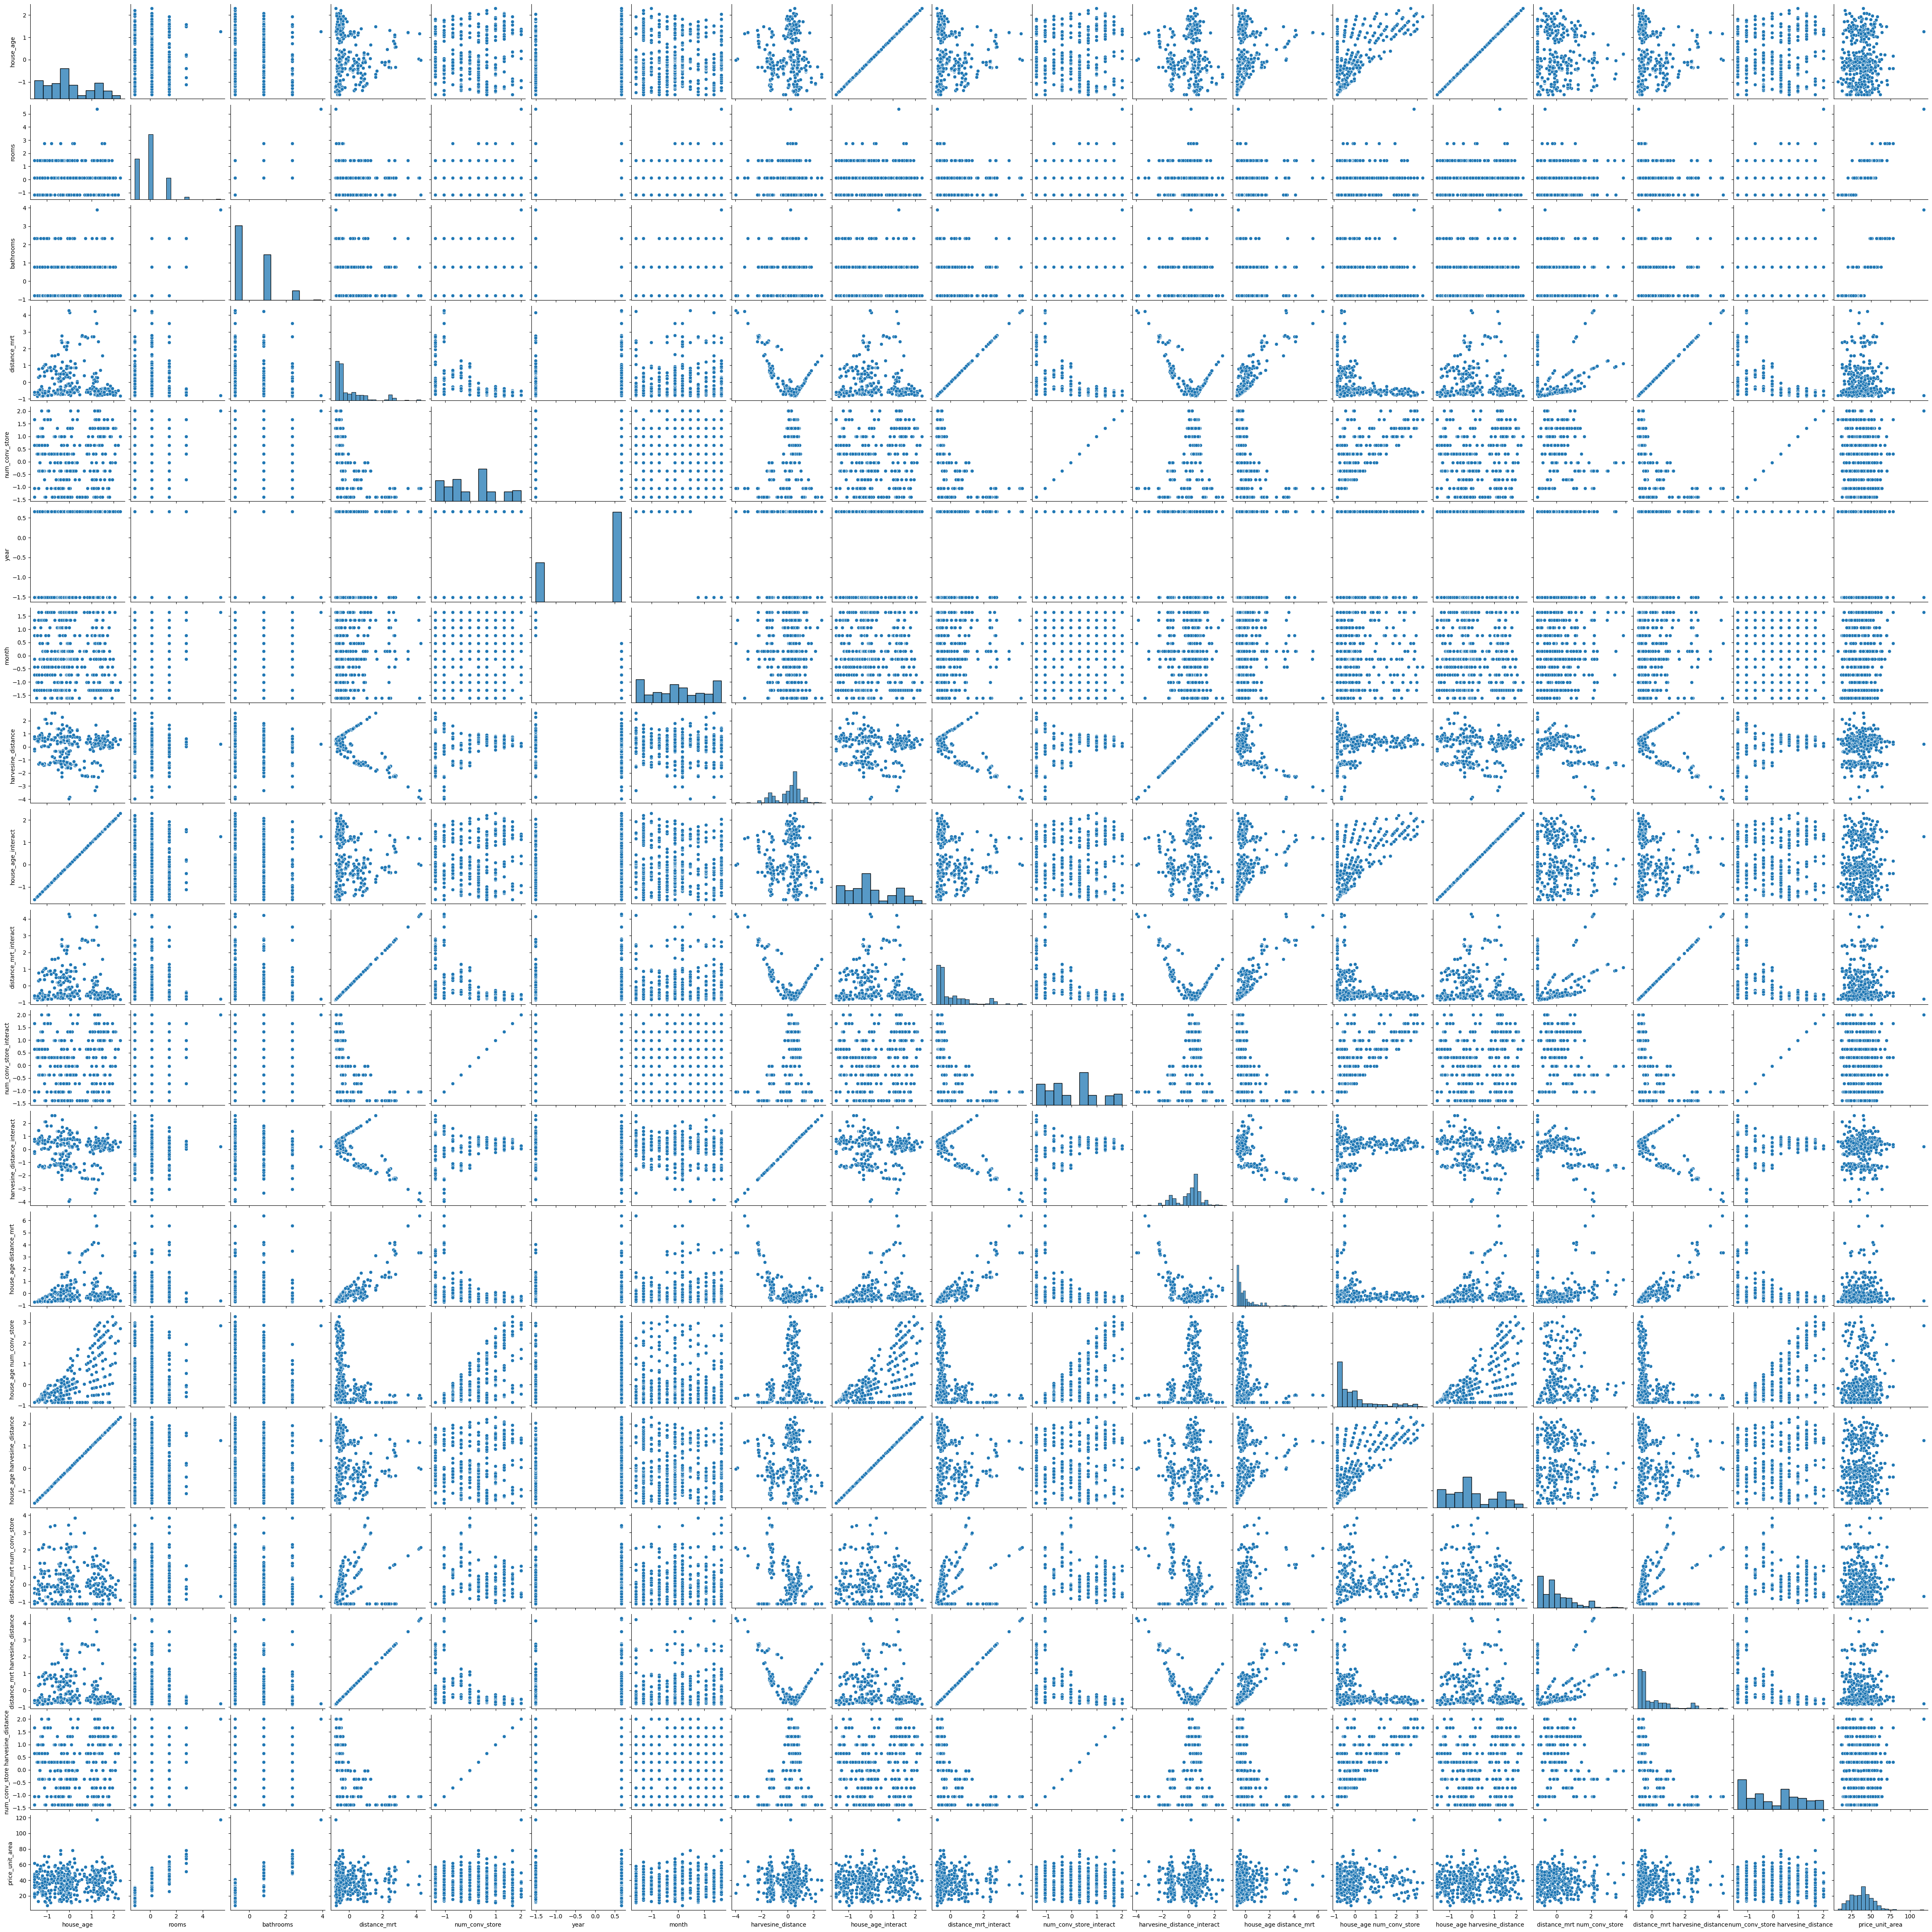

In [17]:
# Creating pair plot
sns.pairplot(extended_data[continuous_features + ['price_unit_area']])
plt.show()

# **KNN Regressor Model**

**Feature Selection**

In [18]:
feature_names = continuous_features

# Feature selection using SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(extended_data[feature_names], extended_data['price_unit_area'])

# Get selected features
selected_features = np.array(feature_names)[selector.get_support()]

# Get feature scores
feature_scores = selector.scores_

important_features = []

# Print feature importances
for i, (feature_name, score) in enumerate(zip(feature_names, feature_scores)):
    print(f"{feature_name}: Score = {score:.4f}")
    if score >= 1:
      important_features.append(feature_name)

print("----------------------------------------------------")
print("The important features based on the scores are:")
print(important_features)

house_age: Score = 0.8505
rooms: Score = 1462.6958
bathrooms: Score = 886.0686
distance_mrt: Score = 0.0076
num_conv_store: Score = 0.5610
year: Score = 0.3977
month: Score = 3.1036
harvesine_distance: Score = 0.0040
house_age_interact: Score = 0.8505
distance_mrt_interact: Score = 0.0076
num_conv_store_interact: Score = 0.5610
harvesine_distance_interact: Score = 0.0040
house_age distance_mrt: Score = 0.7139
house_age num_conv_store: Score = 0.3663
house_age harvesine_distance: Score = 0.8504
distance_mrt num_conv_store: Score = 0.0162
distance_mrt harvesine_distance: Score = 0.0076
num_conv_store harvesine_distance: Score = 0.5610
----------------------------------------------------
The important features based on the scores are:
['rooms', 'bathrooms', 'month']


**Impact of the features**

- rooms: Highly significant (Score = 1462.6958). Each additional room substantially affects price per unit area, making it a crucial predictor.
- bathrooms: Also highly significant (Score = 886.0686). Number of bathrooms is a key factor influencing property value, indicating strong impact.
- month: Moderately significant (Score = 3.1036). Seasonality impacts house prices, with certain months being more favorable for transactions.
- num_conv_store: Moderately significant (Score = 0.5610). Number of nearby convenience stores affects property values, but to a lesser extent.
- house_age: Moderate significance (Score = 0.8505). Age of the house influences price, but its impact might be limited compared to other features.
- distance_mrt: Low significance (Score = 0.0076). Proximity to public transportation has a minimal impact on house prices in this dataset.
- year: Low significance (Score = 0.3977). Year of construction might affect prices, but its influence seems limited here.
- harvesine_distance: Very low significance (Score = 0.0040). Distance between properties has minimal impact on prices.

**Data Split**

In [19]:
# Split the dataset into features (X) and target (y)

all_features = continuous_features
less_features = important_features

X = extended_data[all_features]
X_less = extended_data[less_features]
y = extended_data['price_unit_area']

**Model Performance**

In [20]:
# Define the range of n_neighbors and random states
n_neighbors_range = range(1, 20)
random_states = range(1, 21)

store_scores = {}

data_features = [('all_features', X), ('less_features', X_less)]

for a,b in data_features:
  # Initialize a dictionary to store the accuracy scores
  scores = {
      'random_state': [],
      'n_neighbors': [],
      'training_r2': [],
      'test_r2': []
  }
  # Train and evaluate the model for each combination of n_neighbors and random_state
  for random_state in random_states:
      for n_neighbors in n_neighbors_range:
          # Split the data into training and testing sets
          X_train, X_test, y_train, y_test = train_test_split(b, y, test_size=0.25, random_state=random_state)

          # Initialize and train the Regressor model
          reg = KNeighborsRegressor(n_neighbors=n_neighbors)
          reg.fit(X_train, y_train)

          # Make predictions and calculate R^2 for training and test sets
          y_train_pred = reg.predict(X_train)
          y_test_pred = reg.predict(X_test)
          training_r2_score = reg.score(X_train, y_train)
          test_r2_score = reg.score(X_test, y_test)

          # Store the scores
          scores['random_state'].append(random_state)
          scores['n_neighbors'].append(n_neighbors)
          scores['training_r2'].append(training_r2_score)
          scores['test_r2'].append(test_r2_score)

  # Convert the scores dictionary to a DataFrame for better visualization
  store_scores[f'{a}'] = pd.DataFrame(scores)

In [21]:
# Scores if all features
all = store_scores['all_features'].sort_values('test_r2', ascending=False)
all.head(10)

,random_state,n_neighbors,training_r2,test_r2
21,2,3,0.849925,0.720609
22,2,4,0.804961,0.717350
363,20,3,0.837073,0.717237
193,11,4,0.807475,0.713982
194,11,5,0.773492,0.713619
23,2,5,0.767028,0.713600
20,2,2,0.897927,0.712366
211,12,3,0.853212,0.710667
192,11,3,0.844994,0.710412
24,2,6,0.742582,0.710180


In [22]:
# Scores if less features
less = store_scores['less_features'].sort_values('test_r2', ascending=False)
less.head(10)

,random_state,n_neighbors,training_r2,test_r2
235,13,8,0.847649,0.891695
236,13,9,0.843514,0.889444
237,13,10,0.841420,0.888158
239,13,12,0.836019,0.887655
238,13,11,0.838624,0.886409
240,13,13,0.833743,0.885847
242,13,15,0.828420,0.885177
243,13,16,0.825470,0.884550
241,13,14,0.832006,0.884141
244,13,17,0.821945,0.883636


**Plot Average R-Squares for All Random States and n=[1-20]**

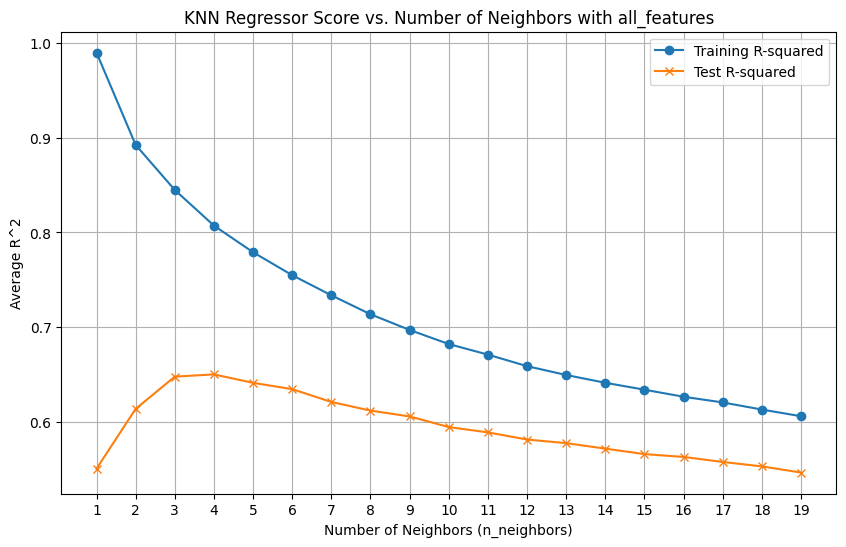

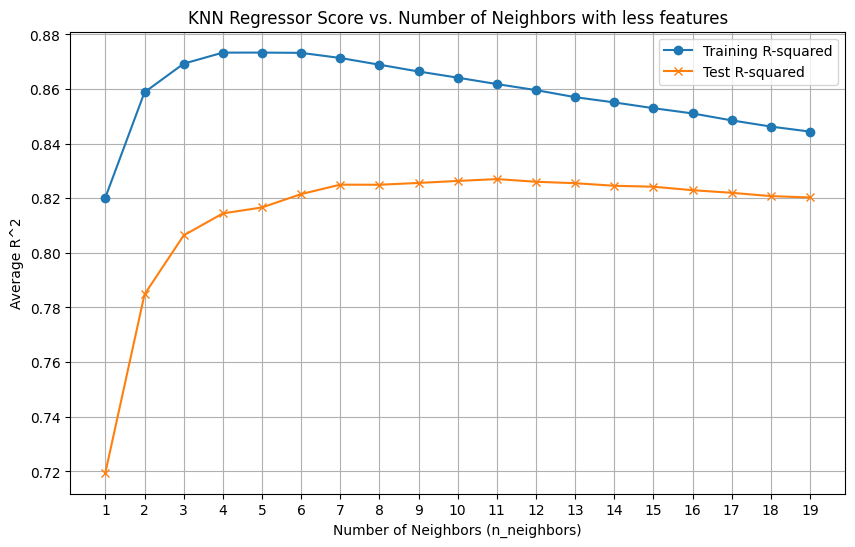

In [23]:
for a,b in [('all_features', all), ('less features', less)]:
  # Group by 'n_neighbors' and calculate mean for training and test R-squared results
  mean_scores = b.groupby('n_neighbors').agg({'training_r2': 'mean', 'test_r2': 'mean'}).reset_index()

  # Plotting
  plt.figure(figsize=(10, 6))

  plt.plot(mean_scores['n_neighbors'], mean_scores['training_r2'], label='Training R-squared', marker='o')
  plt.plot(mean_scores['n_neighbors'], mean_scores['test_r2'], label='Test R-squared', marker='x')

  plt.title(f'KNN Regressor Score vs. Number of Neighbors with {a}')
  plt.xlabel('Number of Neighbors (n_neighbors)')
  plt.ylabel('Average R^2')
  plt.xticks(range(1, 20))  # Assuming n_neighbors_range is from 1 to 20
  plt.grid(True)
  plt.legend()

  plt.show()

# **Conclusion**

When comparing the Average R squared of KNN Regression using all continuous features versus only using important features like 'rooms', 'bathrooms', and 'months', the latter demonstrates superior performance.

With all features, the highest average R squared reaches approximately 65% with k=4. However, when utilizing fewer but impactful features, the highest average R squared improves to about 83% with k ranging between 9 to 12.

This improvement underscores the significance of key features such as 'rooms' and 'bathrooms', which exhibit strong positive correlations with house prices, as evidenced by their high features scores. Additionally, the influence of seasonality is notable, with specific months potentially driving more favorable market conditions for property transactions.


**INSIGHTS**

Here are some key takeaways and the importance of each step in the process:

    Importance of Data Analysis:
        The initial data exploration, including visualization of the distribution of features and correlation analysis, is crucial.
        It helps in understanding the underlying structure of the data and in identifying which features have the most influence
        on the target variable, in this case, the price_range.
        
        Spearman's rank correlation was particularly useful in this context due to the mixed data types and the non-linear
         relationships present in the dataset.

    Feature Scaling:
        Feature scaling, through methods such as standardization, was critical in normalizing the ranges of the continuous features.
        This is especially important for distance-based algorithms like KNN, as it ensures that each feature contributes equally
        to the distance calculations, preventing features with larger ranges from dominating the model.

    Feature Selection:
        Selecting features that have a significant correlation with the target variable can greatly improve model performance.
        The analysis showed a notable difference in accuracies when using all features versus using only the selected
        significant features. This underscores the importance of feature selection in building efficient and effective
        predictive models.
        
        By focusing on the most relevant features, the model not only becomes simpler and faster but also
        avoids the risk of overfitting, which can occur when too many irrelevant or less important features are used.
    
    Interactive Features
        Creating interaction features captures the model's non-linear relationships and interactions between different variables, leading to improved predictive performance.

    Training and Testing Across Multiple States and n Values:
        Conducting the training and testing of the model across multiple random states and varying the number of neighbors (n) in KNN
        ensures that the model's performance is robust and generalizable across different subsets of the data.

        This approach helps in identifying a good hyperparameter (n) for the model, as it accounts for variability in the data
        splits and reduces the risk of overfitting to a particular sample of the data.

    Identifying the Best n Values:
        The analysis indicated that the best values for n, based on the plotted mean scores, range from 9 to 12.
        
        This suggests that considering a larger number of neighbors helps in making more stable and reliable predictions,
        as it reduces the noise in the regression process.

    Additional Insights:
        It's also important to consider the balance between model complexity and performance. While a more complex model
         (with a lower n) might provide higher accuracy on the training set, it might not generalize well to unseen data.
         
         The chosen range of 9 to 12 for n strikes a good balance, providing high R^2 while preventing the model
         from becoming too sensitive to the training data.

         It was observed that the performance of KNN Regression is low vs KNN Classification because the data in regression has a high degree of variability or noise. In regression tasks, the predicted value is influenced by the actual values of the nearest neighbors, and if the data is noisy or has high variance, this can lead to less accurate predictions. Thus feature scaling, feature selection and interactive features play an important role in setting up the data sets to improve the model's performance.